# Which Economic Tasks are Performed with AI? Evidence from Millions of Claude Conversations

_Handa et al., 2025_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
import numpy as np

palette = sns.color_palette("colorblind")

In [13]:
# Load employment data
bls_employment_df = pd.read_csv("bls_employment_may_2023.csv")

claude_employment_df = grouped_with_occupations.groupby("SOC or O*NET-SOC 2019 Title")["pct_occ_scaled"].sum().reset_index(name='claude_distribution')

employment_df = claude_employment_df.merge(bls_employment_df, 
                                     on='SOC or O*NET-SOC 2019 Title',
                                     how='left')

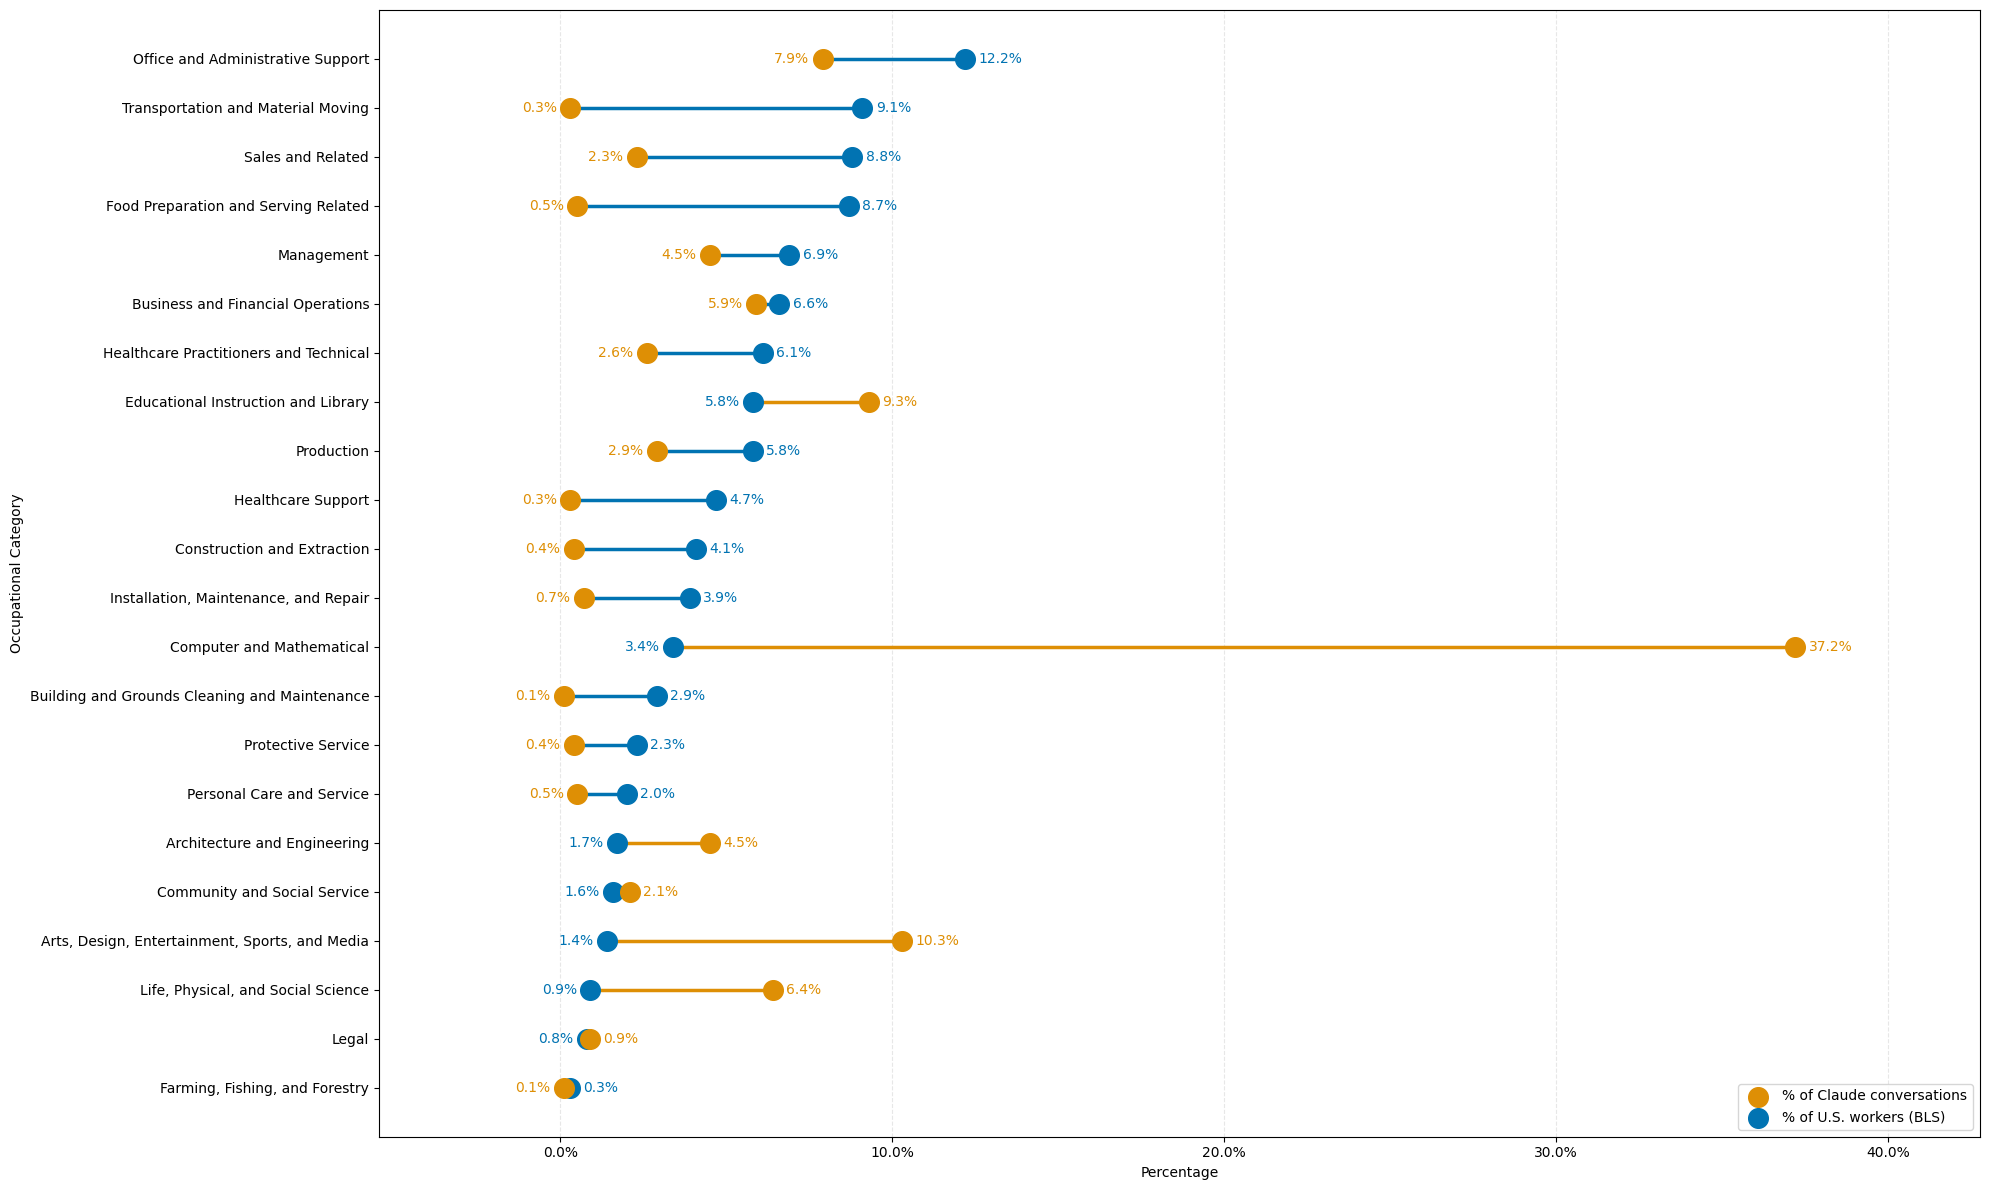

In [14]:
# Calculate percentages and setup data
plot_df = employment_df.copy()

def get_distribution(df, value_column):
   total = df[value_column].sum()
   return (df[value_column] / total * 100).round(1)

plot_df['bls_pct'] = get_distribution(plot_df, 'bls_distribution')
plot_df['claude_pct'] = get_distribution(plot_df, 'claude_distribution')
plot_df['clean_label'] = plot_df['SOC or O*NET-SOC 2019 Title'].str.replace(' Occupations', '')
plot_df['pct_difference'] = plot_df['claude_pct'] - plot_df['bls_pct']
plot_df = plot_df.sort_values('bls_pct', ascending=True)

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12))

# Set colors
claude_color = palette[1] 
bls_color = palette[0] 

# Create lines and circles
y_positions = range(len(plot_df))
for i, row in enumerate(plot_df.itertuples()):
   # Determine color based on which value is larger
   line_color = claude_color if row.claude_pct > row.bls_pct else bls_color
   
   # Draw the line between bls and claude percentages
   ax.plot([row.bls_pct, row.claude_pct], [i, i], 
           color=line_color, 
           linestyle='-', 
           linewidth=2.5,
           zorder=1)
   
   # Determine label positioning
   if row.claude_pct > row.bls_pct:
       bls_ha = 'right'
       claude_ha = 'left'
       bls_offset = -0.4
       claude_offset = 0.4
   else:
       bls_ha = 'left'
       claude_ha = 'right'
       bls_offset = 0.4
       claude_offset = -0.4

   # Plot BLS percentage
   ax.scatter([row.bls_pct], [i], 
              color=bls_color,
              s=200,
              zorder=2,
              label='% of U.S. workers (BLS)' if i == 0 else "")
   ax.text(row.bls_pct + bls_offset,
           i,
           f'{row.bls_pct:.1f}%',
           ha=bls_ha,
           va='center',
           color=bls_color)
   
   # Plot Claude's percentage
   ax.scatter([row.claude_pct], [i], 
              color=claude_color,
              s=200,
              zorder=2,
              label='% of Claude conversations' if i == 0 else "")
   ax.text(row.claude_pct + claude_offset,
           i,
           f'{row.claude_pct:.1f}%',
           ha=claude_ha,
           va='center',
           color=claude_color)

# Customize the plot
ax.set_xlabel('Percentage')
ax.set_ylabel('Occupational Category')

# Add percentage formatter to x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Set y-axis labels
ax.set_yticks(y_positions)
ax.set_yticklabels(plot_df['clean_label'])

# Add legend
handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Adjust grid and layout
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Set axis limits with padding
max_val = max(plot_df['bls_pct'].max(), plot_df['claude_pct'].max())
min_val = min(plot_df['bls_pct'].min(), plot_df['claude_pct'].min())
padding = (max_val - min_val) * 0.15
ax.set_xlim(min_val - padding, max_val + padding)
ax.set_ylim(-1, len(plot_df))

# Adjust layout
plt.tight_layout()
plt.show()

### USAGE BY WAGE

In [15]:
# Read and process wage data
wage_df = pd.read_csv("wage_data.csv")

In [16]:
wage_df

,SOCcode,JobName,JobFamily,isBright,isGreen,JobZone,MedianSalary,JobForecast,ChanceAuto,WageGroup
0,13-2011.01,Accountants,Business and Financial Operations,True,False,4,70500.00,146000,-1.0,Accountants and Auditors
1,13-2011.00,Accountants and Auditors,Business and Financial Operations,True,False,-1,70500.00,146000,94.0,NaN
2,27-2011.00,Actors,"Arts, Design, Entertainment, Sports, and Media",False,False,2,17.54,7700,37.0,NaN
3,15-2011.00,Actuaries,Computer and Mathematical,True,False,4,102880.00,2200,21.0,NaN
4,29-1199.01,Acupuncturists,Healthcare Practitioners and Technical,True,False,5,73960.00,3400,-1.0,"Health Diagnosing and Treating Practitioners, ..."
...,...,...,...,...,...,...,...,...,...,...
1085,51-7099.00,"Woodworkers, All Other",Production,False,False,-1,31170.00,1900,-1.0,NaN
1086,51-7042.00,"Woodworking Machine Setters, Operators, and Te...",Production,False,False,2,29730.00,11100,97.0,NaN
1087,43-9022.00,Word Processors and Typists,Office and Administrative Support,False,False,2,39750.00,4100,81.0,NaN
1088,27-3043.00,Writers and Authors,"Arts, Design, Entertainment, Sports, and Media",False,False,-1,62170.00,12800,4.0,NaN


In [17]:
# Join wage and occupation data
grouped_with_occupations_and_wage = grouped_with_occupations.merge(wage_df, left_on="O*NET-SOC Code", right_on="SOCcode", how="left")
grouped_with_occupations_and_wage

,task_name,pct,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,...,SOCcode,JobName,JobFamily,isBright,isGreen,JobZone,MedianSalary,JobForecast,ChanceAuto,WageGroup
0,act as advisers to student organizations.,0.006775,25-1011.00,"Business Teachers, Postsecondary",5682.0,Act as advisers to student organizations.,Core,95.0,07/2011,Incumbent,...,25-1011.00,"Business Teachers, Postsecondary","Education, Training, and Library",True,False,5.0,83960.0,11200.0,-1.0,NaN
1,act as advisers to student organizations.,0.006775,25-1021.00,"Computer Science Teachers, Postsecondary",5700.0,Act as advisers to student organizations.,Supplemental,58.0,07/2011,Incumbent,...,25-1021.00,"Computer Science Teachers, Postsecondary","Education, Training, and Library",False,False,5.0,82220.0,3600.0,-1.0,NaN
2,act as advisers to student organizations.,0.006775,25-1022.00,"Mathematical Science Teachers, Postsecondary",5726.0,Act as advisers to student organizations.,Supplemental,107.0,07/2011,Incumbent,...,25-1022.00,"Mathematical Science Teachers, Postsecondary","Education, Training, and Library",False,False,5.0,73230.0,5300.0,-1.0,NaN
3,act as advisers to student organizations.,0.006775,25-1031.00,"Architecture Teachers, Postsecondary",5751.0,Act as advisers to student organizations.,Supplemental,72.0,07/2011,Incumbent,...,25-1031.00,"Architecture Teachers, Postsecondary","Education, Training, and Library",True,False,5.0,86980.0,800.0,-1.0,NaN
4,act as advisers to student organizations.,0.006775,25-1032.00,"Engineering Teachers, Postsecondary",5774.0,Act as advisers to student organizations.,Supplemental,70.0,07/2011,Incumbent,...,25-1032.00,"Engineering Teachers, Postsecondary","Education, Training, and Library",True,False,5.0,101720.0,4700.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,"write, design, or edit web page content, or di...",0.320908,15-1134.00,Web Developers,14696.0,"Write, design, or edit Web page content, or di...",Core,30.0,06/2008,Occupational Expert,...,15-1134.00,Web Developers,Computer and Mathematical,True,False,3.0,69430.0,15100.0,21.0,NaN
4241,"write, present, and publish reports that recor...",0.117393,19-3091.02,Archeologists,9155.0,"Write, present, and publish reports that recor...",Core,33.0,07/2012,Occupational Expert,...,19-3091.02,Archeologists,"Life, Physical, and Social Science",True,False,5.0,62410.0,800.0,-1.0,Anthropologists and Archeologists
4242,"write, review, or execute plans for testing ne...",0.010944,15-1199.12,Document Management Specialists,16220.0,"Write, review, or execute plans for testing ne...",Core,25.0,07/2013,Occupational Expert,...,15-1199.12,Document Management Specialists,Computer and Mathematical,True,False,4.0,90270.0,35700.0,-1.0,"Computer Occupations, All Other"
4243,"write, review, or maintain engineering documen...",0.076872,17-2141.02,Automotive Engineers,16425.0,"Write, review, or maintain engineering documen...",Core,23.0,07/2014,Occupational Expert,...,17-2141.02,Automotive Engineers,Architecture and Engineering,False,True,4.0,87370.0,22900.0,-1.0,Mechanical Engineers


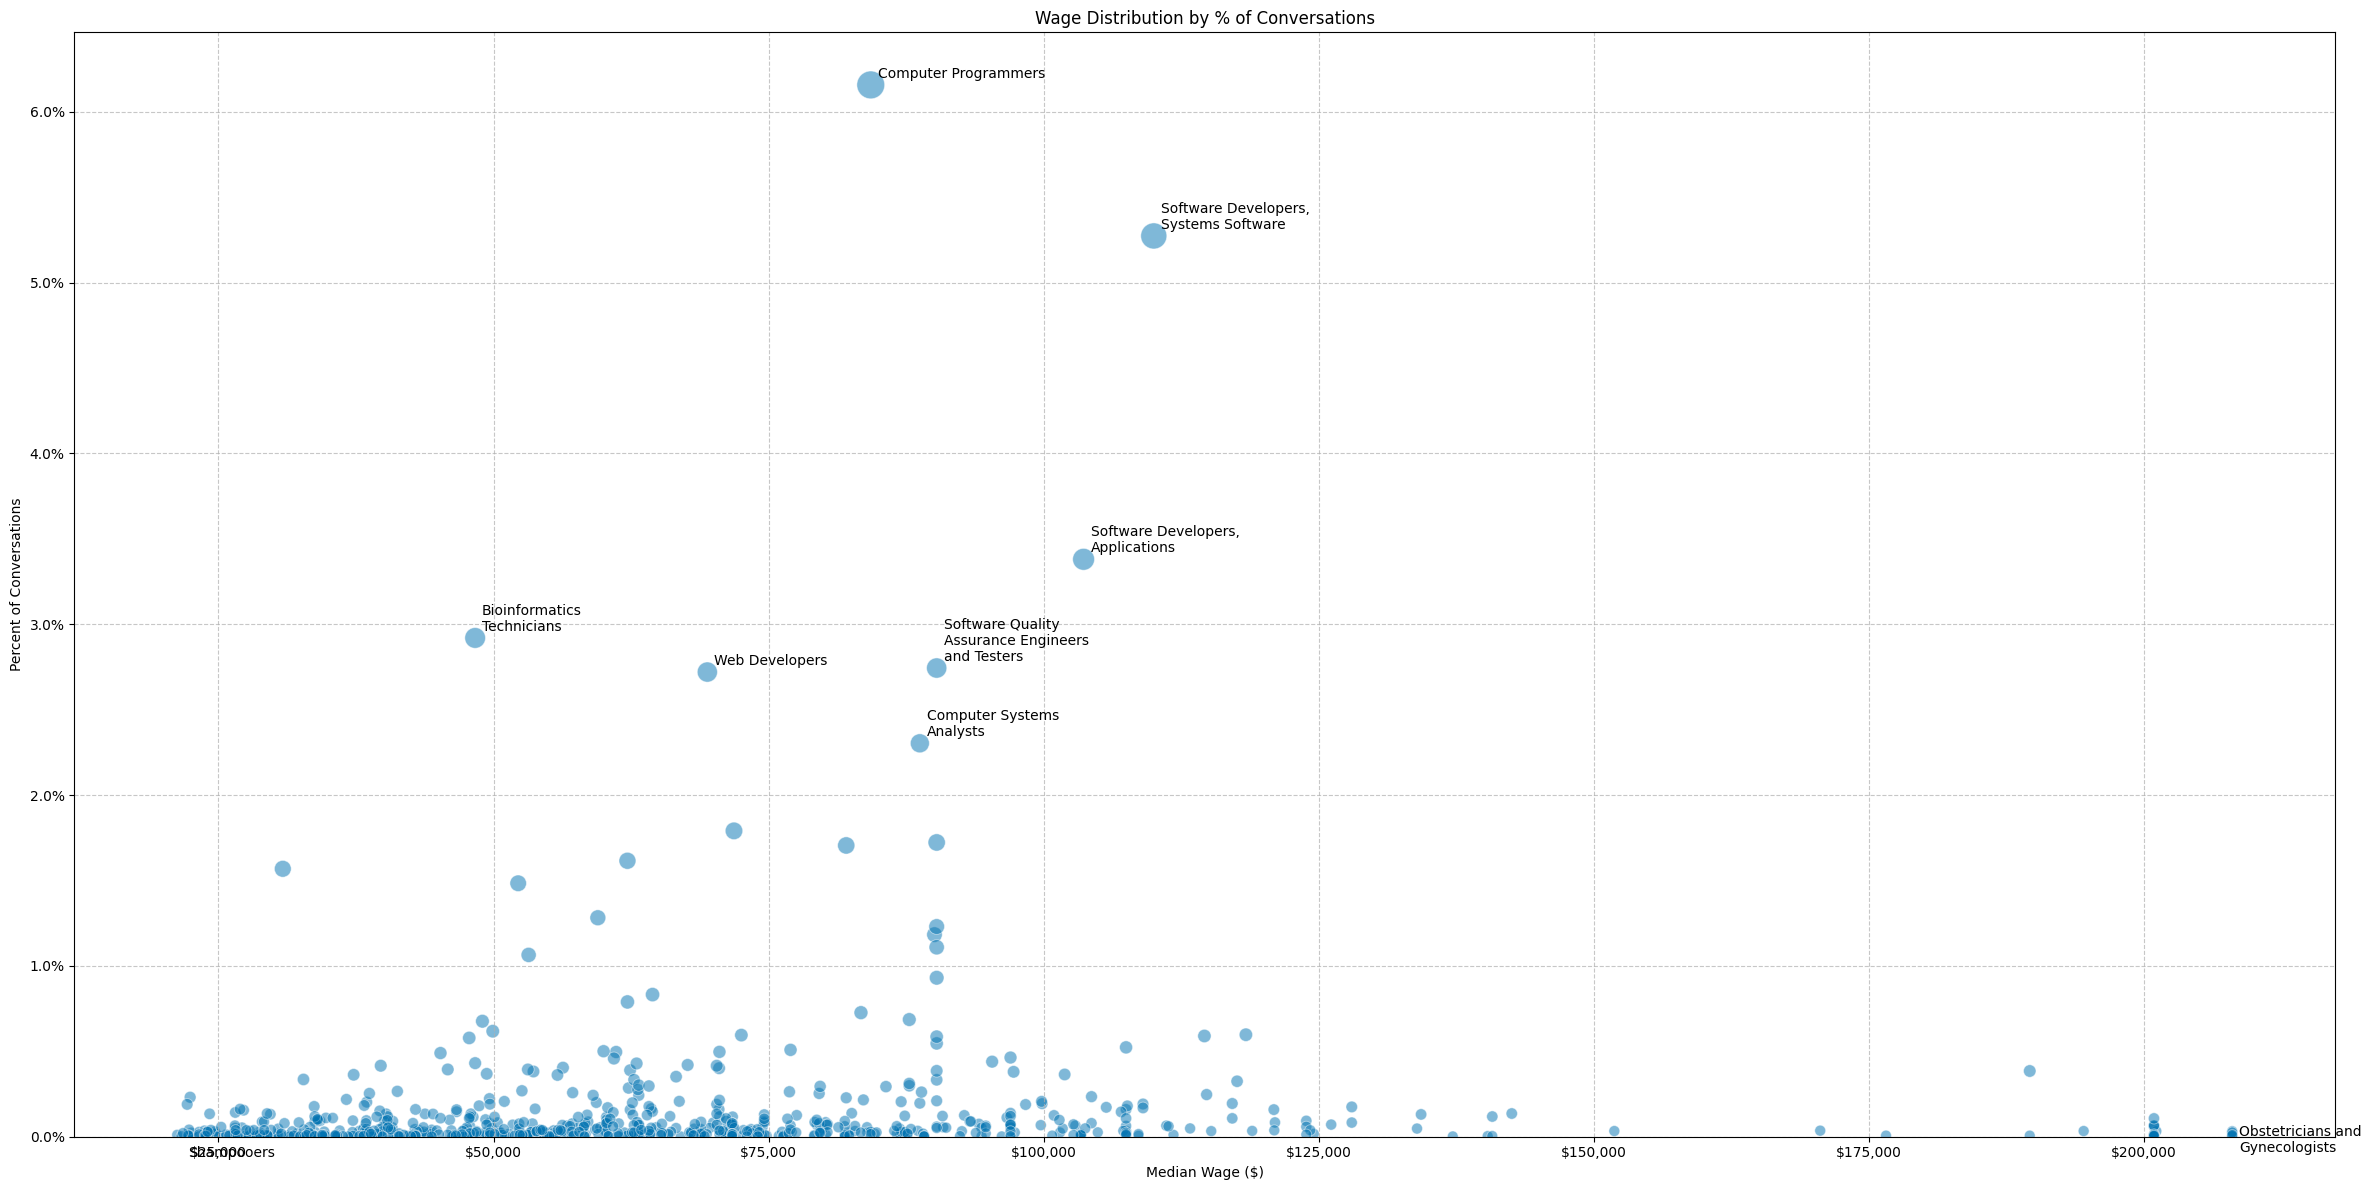

In [18]:
def create_wage_distribution_plot(plot_df):
    # Create figure
    plt.figure(figsize=(24, 12))
    
    # Create scatter plot
    sns.scatterplot(data=plot_df,
                    x='MedianSalary',
                    y='pct_occ_scaled',
                    alpha=0.5,
                    size='pct_occ_scaled',
                    sizes=(60, 400),
                    color=palette[0],
                    legend=False)
    
    # Style the plot
    plt.xlabel('Median Wage ($)')
    plt.ylabel('Percent of Conversations')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}%'.format(y)))
    
    # Add title
    plt.title('Wage Distribution by % of Conversations'), 
    
    # Annotate points
    # Top points by percentage
    top_n = 7
    for _, row in plot_df.nlargest(top_n, 'pct_occ_scaled').iterrows():
        plt.annotate('\n'.join(wrap(row['Title'], width=20)), 
                    (row['MedianSalary'], row['pct_occ_scaled']),
                    xytext=(5, 5), 
                    textcoords='offset points')
    
    # Extreme salary points
    n_extremes = 2
    # Annotate lowest and highest salaries
    for df_subset in [plot_df.nsmallest(n_extremes, 'MedianSalary'),
                     plot_df.nlargest(n_extremes, 'MedianSalary')]:
        for i, row in enumerate(df_subset.iterrows()):
            if i != 0:  # Skip if already annotated in top_n
                plt.annotate('\n'.join(wrap(row[1]['Title'], width=20)), 
                            (row[1]['MedianSalary'], row[1]['pct_occ_scaled']),
                            xytext=(5, -15),
                            textcoords='offset points')
    
    # Formatting
    plt.ylim(bottom=0)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    plt.tight_layout()
    
    plt.show()
    plt.close()

# Create aggregation dictionary, excluding groupby columns
groupby_cols = ["Title"]
agg_dict = {col: 'first' for col in grouped_with_occupations_and_wage.columns 
            if col not in groupby_cols}
agg_dict['pct_occ_scaled'] = 'sum'


plot_df = (grouped_with_occupations_and_wage
            .groupby(groupby_cols)
            .agg(agg_dict)
            .reset_index()
            .copy())
    
# Filter out null values and very low salaries
plot_df = plot_df[plot_df["MedianSalary"].notnull() & 
                    (plot_df["MedianSalary"] > 100)]
    
# Create and save plot for current group
create_wage_distribution_plot(plot_df)